# Data Analysis for Stations
## 

In [1]:
## if the modules are not found run the following command with the module name e.g.
##!pip install pandas

In [51]:
## import modules
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
## import data
all_files = glob.glob("data/*.csv") # "../data/*.csv"
print(all_files)
header_list= ["airtime", "artist", "song"]

['data\\20minfr.csv', 'data\\arg.csv', 'data\\bsk.csv', 'data\\drs1.csv', 'data\\fm1.csv', 'data\\mun.csv', 'data\\neo1.csv', 'data\\nrj.csv', 'data\\r24.csv', 'data\\rl.csv', 'data\\rro.csv', 'data\\rso.csv', 'data\\sun.csv', 'data\\zsee.csv']


In [96]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=[1,2,3], sep=',', names=header_list)
    df["station"] = filename
    li.append(df)

frame = pd.concat(li, ignore_index=True)

In [97]:
frame.shape

(1951001, 4)

In [98]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb x Zak Abel,Sad in Scandinavia,data\20minfr.csv
1,01.10.2020 00:06,Ray Dalton,In My Bones,data\20minfr.csv
2,01.10.2020 00:09,NaN,NaN,data\20minfr.csv
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,data\20minfr.csv
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,data\20minfr.csv


In [82]:
## add station name to frame
station_names_dictionary={  "data\20minfr.csv" : "20 Minuten Französisch",
                            "data\arg.csv" : "Radio Argovia",
                            "data\bsk.csv" : "Radio Basilisk",
                            "data\drs1.csv" : "Radio SRF1",
                            "data\fm1.csv" : "Radio FM1",
                            "data\mun.csv" : "Radio Munot",
                            "data\neo1.csv" : "Neo 1",
                            "data\nrj.csv" : "EnergyBE/ZH/BS",
                            "data\r24.csv" : "Radio 24",
                            "data\rl.csv" : "Radio Liechtenstein",
                            "data\rro.csv" : "Radio Rottu Oberwallis",
                            "data\rso.csv" : "Radio Südostschweiz",
                            "data\sun.csv" : "Radio Sunshine",
                            "data\zsee.csv" : "Radio Zürichsee"  
                         }

frame= frame.replace({"station": station_names_dictionary})

In [83]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb X Zak Abel,Sad In Scandinavia,data\20minfr.csv
1,01.10.2020 00:06,Ray Dalton,In My Bones,data\20minfr.csv
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,data\20minfr.csv
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,data\20minfr.csv
5,01.10.2020 00:21,Jawsh 685 & Jason Derulo,Savage Love (Laxed - Siren Beat),data\20minfr.csv


In [84]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652827 entries, 0 to 1951000
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   airtime  1652827 non-null  object
 1   artist   1652827 non-null  object
 2   song     1652827 non-null  object
 3   station  1652827 non-null  object
dtypes: object(4)
memory usage: 63.1+ MB


In [85]:
frame.describe()

,airtime,artist,song,station
count,1652827,1652827,1652827,1652827
unique,530531,9568,19125,14
top,05.10.2020 10:41,Ava Max,Giants,data\rso.csv
freq,11,20748,7328,151891


#### Clean up data 

In [86]:
## remove empty or with missing info data points
print("-------------------------------")
print("##### No.of null values")
print(frame.isna().sum())
# drop all rows with any NaN and NaT values
frame = frame.dropna()
print("------------------------------")
print("##### Clean of null values")
print(frame.isna().sum())

-------------------------------
##### No.of null values
airtime    0
artist     0
song       0
station    0
dtype: int64
------------------------------
##### Clean of null values
airtime    0
artist     0
song       0
station    0
dtype: int64


In [87]:
## some datapoint ahve non standartized names for artists and songs
## make all words camel case, strip empty spaces

frame["artist"]= [item.title().strip() for item in frame["artist"]] 
frame["song"]= [item.title().strip() for item in frame["song"]] 

In [88]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb X Zak Abel,Sad In Scandinavia,data\20minfr.csv
1,01.10.2020 00:06,Ray Dalton,In My Bones,data\20minfr.csv
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,data\20minfr.csv
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,data\20minfr.csv
5,01.10.2020 00:21,Jawsh 685 & Jason Derulo,Savage Love (Laxed - Siren Beat),data\20minfr.csv


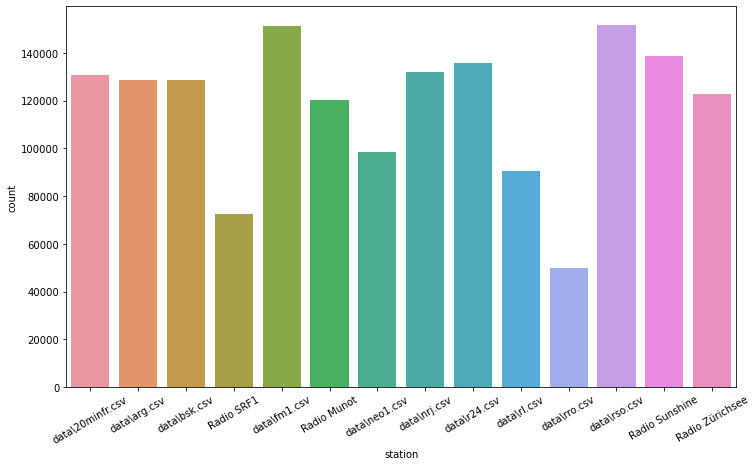

In [89]:
## descriptive analysis 
## plot station distribution 
plt.figure(figsize=(12,7))
ax= sns.countplot(x=frame["station"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# uncomment if you want to save png
#plt.savefig('station_dist.png', facecolor='w', bbox_inches='tight')
plt.show()

###  Analysis Questions 
1. Top most played songs for every station. How many times did they play it?

In [90]:
ordered_songs_per_station= frame.groupby(['station', 'artist', 'song']).size().reset_index(name='counts')
ordered_songs_per_station

,station,artist,song,counts
0,Radio Munot,"10,000 Maniacs",Because The Night,6
1,Radio Munot,11Ã,Nei,1
2,Radio Munot,3 Doors Down,Here Without You,72
3,Radio Munot,4 Non Blondes,What'S Up?,126
4,Radio Munot,5 Seconds Of Summer,Teeth,22
...,...,...,...,...
49016,data\rso.csv,Züri West,Goalie,65
49017,data\rso.csv,Züri West,Göteborg,1
49018,data\rso.csv,Züri West,I Schänke Dr Mis Härz,74
49019,data\rso.csv,Züri West,Johnny & Mary,21


In [91]:
all_stations= ordered_songs_per_station["station"].unique()
top_songs_list= []

for item in all_stations:
    #print("Station: ", item)
    station_playlist=ordered_songs_per_station[ordered_songs_per_station["station"]==item]
    # index corresponding max value
    i = station_playlist['counts'].idxmax()
    # store the name corresponding this index
    df = station_playlist.loc[station_playlist.counts.idxmax()]
    top_songs_list.append(df)
    
top_songs_df = pd.DataFrame(top_songs_list)    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

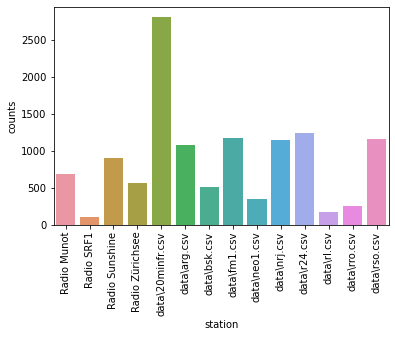

In [92]:
splot= sns.barplot(data=top_songs_df, x='station', y='counts')
plt.xticks(rotation=90)

In [94]:
top_songs_df

,station,artist,song,counts
1518,Radio Munot,Ofenbach Feat. Lagique,Wasted Love,688
9353,Radio SRF1,Paul Mccartney,Hope Of Deliverance,108
15584,Radio Sunshine,Purple Disco Machine & Sophie And The Giants,Hypnotized,905
17593,Radio Zürichsee,Dermot Kennedy,Giants,562
21780,data\20minfr.csv,Vize & Tom Gregory,Never Let Me Down,2801
23511,data\arg.csv,Twocolors,Lovefool,1076
26436,data\bsk.csv,Purple Disco Machine & Sophie And The Giants,Hypnotized,514
28412,data\fm1.csv,Miley Cyrus,Midnight Sky,1164
32784,data\neo1.csv,The Weeknd,Save Your Tears,350
34244,data\nrj.csv,Robin Schulz Feat. Kiddo,All We Got,1142


2. Which songs does x station play, that other stations dont play

In [38]:
## change the names of the 2 stations you want to compare
primary="Radio Argovia"
second="Radio Basilisk" 

### List of songs on first station but not second

In [39]:
df1= frame[frame["station"]==primary][["artist", "song"]]

df2=frame[frame["station"]==second][["artist", "song"]]


df_all = df1.merge(df2.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)

In [40]:
unique_first_station=df_all[df_all["_merge"]=="left_only"]
unique_first_station=unique_first_station.drop(columns="_merge")

In [41]:
unique_first_station.head()

,artist,song


### List of songs on second station but not first

In [42]:
df_all = df2.merge(df1.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)
unique_scnd_station=df_all[df_all["_merge"]=="left_only"]
unique_scnd_station=unique_scnd_station.drop(columns="_merge")

In [43]:
unique_scnd_station.head()

,artist,song


In [44]:
unique_frst= unique_first_station.shape[0]
unique_scnd= unique_scnd_station.shape[0]

print(f'Number of unique songs in first: {unique_frst}.')
print(f'Number of unique songs in second: {unique_scnd}.')

Number of unique songs in first: 0.
Number of unique songs in second: 0.


In [45]:
## to store in file unique first station
#filename_frst= f'IN {primary} NOT {second}'
#unique_first_station.to_csv(filename, index=False)

In [46]:
## to store in file unique second station
#filename_frst= f'IN {second} NOT {primary}'
#unique_scnd_station.to_csv(filename, index=False)

3. Is station's (nrj.csv) playlist coppied by other stations? (On how many songs do the stations overlap on?) 

In [47]:
nrj_stat= frame[frame["station"]=="EnergyBE/ZH/BS"][["artist", "song"]]
new_frame = frame.drop(nrj_stat.index)

In [48]:
all_stations= new_frame["station"].unique()
songs_list= []

for item in all_stations:
    df2=frame[frame["station"]==item][["artist", "song"]]
    df_all = df1.merge(df2.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)
    #what are the similar songs
    both_playlist= df_all[df_all["_merge"]=="both"][["artist", "song"]]
    #store playlist
    both_playlist.to_csv(f'copy/c_{item}.csv')
    songs_list.append([item, both_playlist])
    


FileNotFoundError: [Errno 2] No such file or directory: 'copy/c_data\\20minfr.csv'

In [39]:
## all the common songs together 
songs_list

[['Radio Rottu Oberwallis',
                           artist                  song
  1               Imagine Dragons               Natural
  2                  Loco Escrito                 Ámame
  3                           Sia            Chandelier
  4                 Avril Lavigne      Head Above Water
  5               Michael Jackson              Thriller
  ...                         ...                   ...
  128760                    Hecht              Prosecco
  128761           Ellie Goulding                Lights
  128762  P!Nk + Willow Sage Hart  Cover Me In Sunshine
  128763            Kings Of Leon          Use Somebody
  128764                     Zian              Grateful
  
  [120795 rows x 2 columns]],
 ['Radio Zürichsee',
                           artist                  song
  1               Imagine Dragons               Natural
  2                  Loco Escrito                 Ámame
  3                           Sia            Chandelier
  4                 Av